### Indice

- [Grafo](#Grafo)
- [Motif](#Motif)
- [Rinomina](#Rinomina)
- [Identify](#Identify)
- [Zippa](#Zippa)
- [Pipeline gerarchica multicompressione](#Pipeline-gerarchica-multicompressione)
- [Procedura frattale](#Procedura-frattale)
- [Memorizza merge](#Memorizza-merge)
- [Indici](#Indici)

In [1]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

### Grafo 
[torna su](#Indice)

Grafo test di base `G`

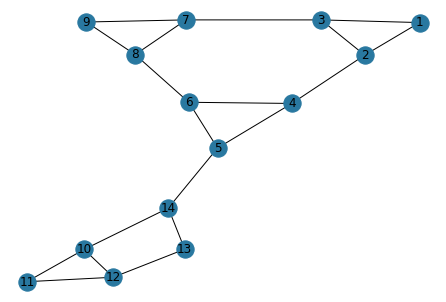

In [22]:
G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4), (4, 5), (5, 6), (4, 6),
                   (6, 8), (7, 8), (7, 9), (8, 9), (3, 7), (5, 14), (14, 10),
                   (14, 13), (10, 11), (11, 12), (10, 12), (12, 13)])

nx.draw(G0, node_color='#2978A0', with_labels = True)


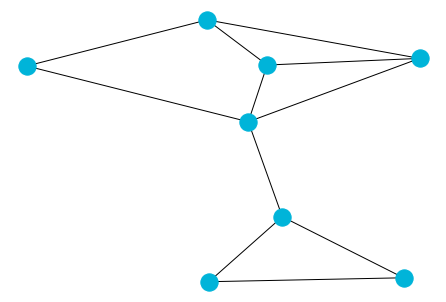

In [16]:
G0 = nx.Graph()
G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
nx.draw(G0, node_color='#00b4d9')

### Motif 
[torna su](#Indice)

Sottografo `motif`

In [23]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

### Rinomina 
[torna su](#Indice)

Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [24]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

### Identify
[torna su](#Indice)

Identify `motif` in `G`

In [25]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

### Zippa
[torna su](#Indice)

Restituisce il mapping per la compressione

In [26]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

### Pipeline gerarchica multicompressione
[torna su](#Indice)

_versione livelli misti, non frattale_

Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [27]:
G0 = rinomina(G0)

In [28]:
def multicoll(G, motif):
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return res


In [29]:
res = multicoll(G0, motif)
res

[(0,
  (14,
   [(0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (0, 8),
    (0, 9),
    (0, 10),
    (0, 11),
    (0, 12),
    (0, 13),
    (0, 14)],
   [((0, 1), (0, 2)),
    ((0, 1), (0, 3)),
    ((0, 2), (0, 3)),
    ((0, 2), (0, 4)),
    ((0, 3), (0, 7)),
    ((0, 4), (0, 5)),
    ((0, 4), (0, 6)),
    ((0, 5), (0, 6)),
    ((0, 5), (0, 14)),
    ((0, 6), (0, 8)),
    ((0, 8), (0, 7)),
    ((0, 8), (0, 9)),
    ((0, 7), (0, 9)),
    ((0, 14), (0, 10)),
    ((0, 14), (0, 13)),
    ((0, 10), (0, 11)),
    ((0, 10), (0, 12)),
    ((0, 13), (0, 12)),
    ((0, 11), (0, 12))])),
 (1,
  (6,
   [(1, 1), (1, 4), (1, 7), (1, 10), (0, 13), (0, 14)],
   [((1, 1), (1, 1)),
    ((1, 1), (1, 4)),
    ((1, 1), (1, 7)),
    ((1, 4), (1, 4)),
    ((1, 4), (0, 14)),
    ((1, 4), (1, 7)),
    ((1, 7), (1, 7)),
    ((0, 14), (1, 10)),
    ((0, 14), (0, 13)),
    ((1, 10), (1, 10)),
    ((1, 10), (0, 13))])),
 (2,
  (2,
   [(2, 1), (2, 10)],
   [((2, 1), (2, 1)), ((2,

In [30]:
res = multicoll(G0, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [14, 6, 2] 
Nodi:  [[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14)], [(1, 1), (1, 4), (1, 7), (1, 10), (0, 13), (0, 14)], [(2, 1), (2, 10)]] 
Archi:  [[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 7)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6)), ((0, 5), (0, 14)), ((0, 6), (0, 8)), ((0, 8), (0, 7)), ((0, 8), (0, 9)), ((0, 7), (0, 9)), ((0, 14), (0, 10)), ((0, 14), (0, 13)), ((0, 10), (0, 11)), ((0, 10), (0, 12)), ((0, 13), (0, 12)), ((0, 11), (0, 12))], [((1, 1), (1, 1)), ((1, 1), (1, 4)), ((1, 1), (1, 7)), ((1, 4), (1, 4)), ((1, 4), (0, 14)), ((1, 4), (1, 7)), ((1, 7), (1, 7)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))], [((2, 1), (2, 1)), ((2, 1), (2, 10)), ((2, 10), (2, 10))]] 




[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 7)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6)), ((0, 5), (0, 14)), ((0, 6), (0, 8)), ((0, 8), (0, 7)), ((0, 8), (0, 9)), ((0, 7), (0, 9)), ((0, 14), (0, 10)), ((0, 14), (0, 13)), ((0, 10), (0, 11)), ((0, 10), (0, 12)), ((0, 13), (0, 12)), ((0, 11), (0, 12))]


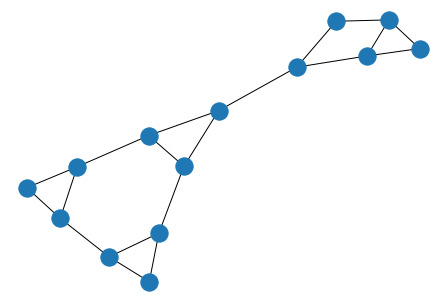

[((1, 1), (1, 1)), ((1, 1), (1, 4)), ((1, 1), (1, 7)), ((1, 4), (1, 4)), ((1, 4), (0, 14)), ((1, 4), (1, 7)), ((1, 7), (1, 7)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


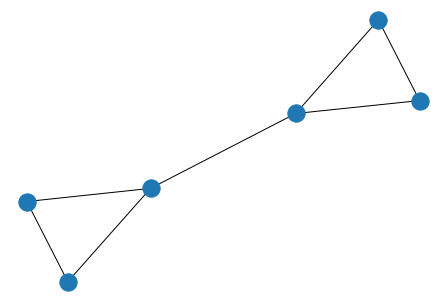

[((2, 1), (2, 1)), ((2, 1), (2, 10)), ((2, 10), (2, 10))]


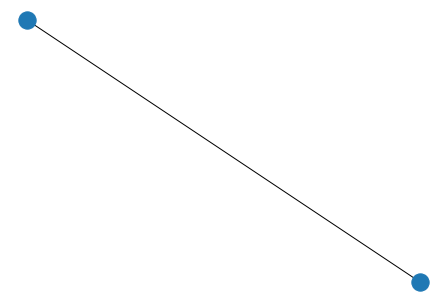

In [31]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---

### Procedura frattale

[torna su](#Indice)

Comprimi **solo se** il livello è uguale all'interno del motif

si potrebbe trovare una legge di multipli per sapere già i nodi comprimibili (?)

compressione di strutture di nodi indipendenti

all'iterazione successiva comprimo su ciò che è già stato compresso

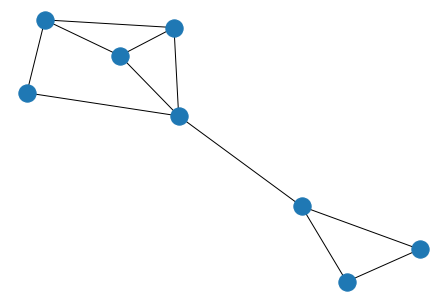

In [14]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
nx.draw(G0)

In [15]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

In [16]:
G = rinomina(G0)

In [17]:
def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    return len(set(iterator)) <= 1

In [18]:
def frattale(G, motif):
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 10:
        ris = identify(motif, G)
        if ris == [] or all_equal(ris[0]) == False: #non va bene!!!!!
            break
        else:# all_equal(ris[0]) == True:
            mapping = zippa(ris, nodi)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res


In [19]:
risultato = frattale(G, motif)
risultato

[(0,
  (8,
   [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)],
   [((0, 7), (0, 1)),
    ((0, 7), (0, 8)),
    ((0, 1), (0, 8)),
    ((0, 1), (0, 2)),
    ((0, 2), (0, 3)),
    ((0, 2), (0, 4)),
    ((0, 2), (0, 5)),
    ((0, 3), (0, 6)),
    ((0, 4), (0, 5)),
    ((0, 4), (0, 6)),
    ((0, 5), (0, 6))])),
 (1,
  (4,
   [(1, 1), (1, 2), (0, 3), (0, 6)],
   [((1, 1), (1, 1)),
    ((1, 1), (1, 2)),
    ((1, 2), (0, 3)),
    ((1, 2), (1, 2)),
    ((1, 2), (0, 6)),
    ((0, 3), (0, 6))]))]

In [20]:
risultato

[(0,
  (8,
   [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)],
   [((0, 7), (0, 1)),
    ((0, 7), (0, 8)),
    ((0, 1), (0, 8)),
    ((0, 1), (0, 2)),
    ((0, 2), (0, 3)),
    ((0, 2), (0, 4)),
    ((0, 2), (0, 5)),
    ((0, 3), (0, 6)),
    ((0, 4), (0, 5)),
    ((0, 4), (0, 6)),
    ((0, 5), (0, 6))])),
 (1,
  (4,
   [(1, 1), (1, 2), (0, 3), (0, 6)],
   [((1, 1), (1, 1)),
    ((1, 1), (1, 2)),
    ((1, 2), (0, 3)),
    ((1, 2), (1, 2)),
    ((1, 2), (0, 6)),
    ((0, 3), (0, 6))]))]

In [21]:
res = frattale(G, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1] 
# nodi:  [8, 4] 
Nodi:  [[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], [(1, 1), (1, 2), (0, 3), (0, 6)]] 
Archi:  [[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))], [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))]] 




In [22]:
nodi

[[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)],
 [(1, 1), (1, 2), (0, 3), (0, 6)]]

[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))]


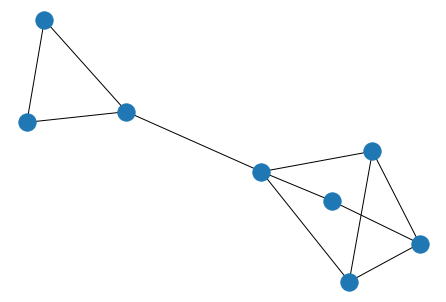

[((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))]


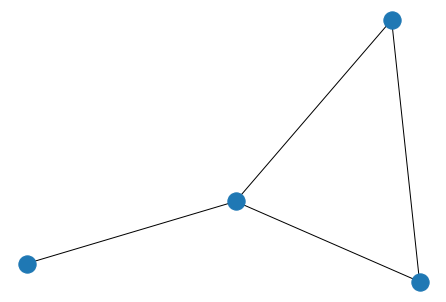

In [23]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---
### Memorizza merge
[torna su](#Indice)

Memorizza merge, per poter ricostruire inversamente

Ora funziona con il primo mapping, da rendere iterabile

In [32]:
def multicoll(G, motif):
    m = []
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            m.append(mapping)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return m


In [17]:
G = rinomina(G0)

In [34]:
m = multicoll(G0, motif)
m

[{(0, 1): (1, 1),
  (0, 2): (1, 1),
  (0, 3): (1, 1),
  (0, 4): (0, 4),
  (0, 5): (0, 5),
  (0, 6): (0, 6),
  (0, 7): (0, 7),
  (0, 8): (0, 8),
  (0, 9): (0, 9),
  (0, 10): (0, 10),
  (0, 11): (0, 11),
  (0, 12): (0, 12),
  (0, 13): (0, 13),
  (0, 14): (0, 14)},
 {(1, 1): (1, 1),
  (0, 4): (1, 4),
  (0, 5): (1, 4),
  (0, 6): (1, 4),
  (0, 7): (0, 7),
  (0, 8): (0, 8),
  (0, 9): (0, 9),
  (0, 10): (0, 10),
  (0, 11): (0, 11),
  (0, 12): (0, 12),
  (0, 13): (0, 13),
  (0, 14): (0, 14)},
 {(1, 1): (1, 1),
  (1, 4): (1, 4),
  (0, 7): (1, 7),
  (0, 8): (1, 7),
  (0, 9): (1, 7),
  (0, 10): (0, 10),
  (0, 11): (0, 11),
  (0, 12): (0, 12),
  (0, 13): (0, 13),
  (0, 14): (0, 14)},
 {(1, 1): (1, 1),
  (1, 4): (1, 4),
  (1, 7): (1, 7),
  (0, 10): (1, 10),
  (0, 11): (1, 10),
  (0, 12): (1, 10),
  (0, 13): (0, 13),
  (0, 14): (0, 14)},
 {(1, 1): (1, 1),
  (1, 4): (1, 4),
  (1, 7): (1, 7),
  (1, 10): (2, 10),
  (0, 13): (2, 10),
  (0, 14): (2, 10)},
 {(1, 1): (2, 1), (1, 4): (2, 1), (1, 7): (2, 1),

In [35]:
def memo(mapping, n):
    dizz = dict()
    for u in mapping:
        
        value_occurrences = collections.Counter(u.values())
        filtered_dict = {key: value for key, value in u.items()
                         if value_occurrences[value] == n}
        new_list = []
        for i, j in filtered_dict.items():
            j = list(j)
            j = i
            j = tuple(j)
            new_list.append(j)
        a = [i for i in new_list[0]]
        a[0] = a[0]+1
        a = tuple(a)
        #print(a, new_list)
        dizz.update({a: new_list})
    return dizz

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, 1): [(0, 1), (0, 2), (0, 3)],
 (1, 4): [(0, 4), (0, 5), (0, 6)],
 (1, 7): [(0, 7), (0, 8), (0, 9)],
 (1, 10): [(0, 10), (0, 11), (0, 12)],
 (2, 10): [(1, 10), (0, 13), (0, 14)],
 (2, 1): [(1, 1), (1, 4), (1, 7)]}

In [36]:
def flatten(lista):
    flat_list = []
    for sublist in lista:
        #print(type(sublist))
        if type(sublist) == tuple:
            flat_list.append(sublist)
        if type(sublist) == list:
            for item in sublist:
                flat_list.append(item)
    return flat_list

In [21]:
m = {(1, 1): [(0, 1), (0, 7), (0, 8)], (1, 2): [(0, 2), (0, 4), (0, 5)], (2, 2): [(1, 2), (0, 3), (0, 6)]}
G_finale = [(1, 1), (2, 2)]

In [66]:
m = {(1, 1): [(0, 1), (0, 2), (0, 3)],
 (1, 4): [(0, 4), (0, 5), (0, 6)],
 (1, 7): [(0, 7), (0, 8), (0, 9)],
 (1, 10): [(0, 10), (0, 11), (0, 12)],
 (2, 10): [(1, 10), (0, 13), (0, 14)],
 (2, 1): [(1, 1), (1, 4), (1, 7)]}
G_finale = [(2, 1), (2, 10)]

In [54]:
zzz

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14)]

In [67]:
def inverti(nodd, m):
    risult=[]
    b = []
    while m != {}:
        
        nodd.sort(key=lambda x:x[0])
        x = nodd[-1]
        y = m.get(x) 
        nodd[nodd.index(x)] = y
        del m[x]
        nodd = flatten(nodd)
        nodd.sort(key=lambda x:x[1])
    risult.append(nodd)
    return risult

zzz = inverti(G_finale, m)

In [68]:
zzz = zzz[0]

In [69]:
zzz

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14)]

In [32]:
archi = [[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))], [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))], [((1, 1), (1, 1)), ((1, 1), (2, 2)), ((2, 2), (2, 2))]] 

[((1, 1), (1, 1)), ((1, 1), (2, 2)), ((2, 2), (2, 2))]


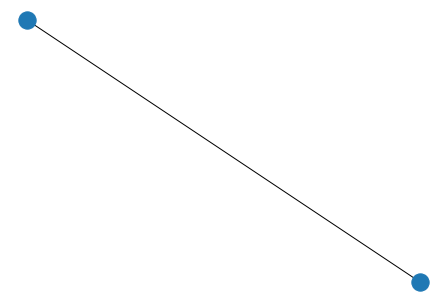

[((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))]


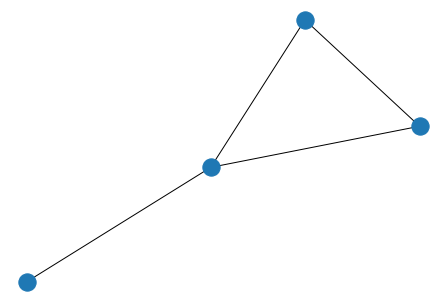

[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))]


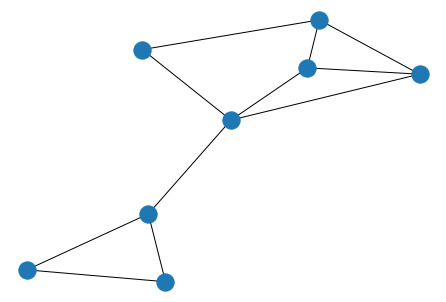

In [33]:
archi = reversed(archi)
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

***

### Indici
[torna su](#Indice)

**Nodi compressi e nodi mantenuti, count e %**

In [34]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(4, 50.0, 4, 50.0)

#### Statistiche per livello

In [35]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  8 
Nodi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] 
Archi:  [((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))] 


Livello:  1 
# nodi:  4 
Nodi:  [(1, 1), (1, 2), (0, 3), (0, 6)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))] 


